In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 假设我们有一些波形数据和对应的标签
# X_train: 训练数据，形状为 (num_samples, num_timesteps, num_features)
# y_train: 训练标签，形状为 (num_samples,)
# X_test: 测试数据，形状为 (num_samples, num_timesteps, num_features)
# y_test: 测试标签，形状为 (num_samples,)

# 生成一些示例数据
num_samples = 1000
num_timesteps = 100
num_features = 1
num_classes = 3

X_train = torch.rand(num_samples, num_timesteps, num_features)
y_train = torch.randint(0, num_classes, (num_samples,))
X_test = torch.rand(num_samples, num_timesteps, num_features)
y_test = torch.randint(0, num_classes, (num_samples,))

# 创建数据加载器
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义神经网络模型
class WaveformClassifier(nn.Module):
    def __init__(self):
        super(WaveformClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=32, kernel_size=3)
        self.fc1 = nn.Linear(32 * (num_timesteps - 2), 100)
        self.fc2 = nn.Linear(100, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # 调整输入形状以适应Conv1d
        x = torch.relu(self.conv1(x))
        x = x.reshape(x.size(0), -1)  # 用 reshape 替代 view
        # x = x.view(x.size(0), -1)  # 展平
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 实例化模型、损失函数和优化器
model = WaveformClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 评估模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f'Test accuracy: {accuracy:.4f}')

Epoch [1/10], Loss: 1.0838
Epoch [2/10], Loss: 1.0786
Epoch [3/10], Loss: 1.0506
Epoch [4/10], Loss: 1.0859
Epoch [5/10], Loss: 1.0668
Epoch [6/10], Loss: 1.1487
Epoch [7/10], Loss: 1.0668
Epoch [8/10], Loss: 1.1246
Epoch [9/10], Loss: 0.9764
Epoch [10/10], Loss: 0.9910
Test accuracy: 0.3410


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Epoch [1/10], Train Loss: 1.0504, Val Loss: 1.1378
Epoch [2/10], Train Loss: 1.0295, Val Loss: 1.1545
Epoch [3/10], Train Loss: 1.0283, Val Loss: 1.1507
Epoch [4/10], Train Loss: 1.0179, Val Loss: 1.1780
Epoch [5/10], Train Loss: 1.0040, Val Loss: 1.1727
Epoch [6/10], Train Loss: 0.9931, Val Loss: 1.1929
Epoch [7/10], Train Loss: 0.9921, Val Loss: 1.1861
Epoch [8/10], Train Loss: 0.9719, Val Loss: 1.1982
Epoch [9/10], Train Loss: 0.9620, Val Loss: 1.2036
Epoch [10/10], Train Loss: 0.9667, Val Loss: 1.2261


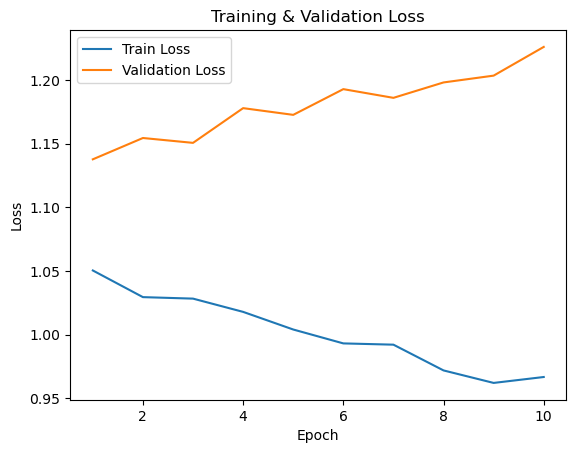

In [3]:
import matplotlib.pyplot as plt

# 假设我们有训练和验证损失列表
train_losses = []
val_losses = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # 验证模型
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
    val_loss = running_loss / len(test_loader.dataset)
    val_losses.append(val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

# 绘制损失曲线
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif'

              precision    recall  f1-score   support

   Category1       0.39      0.21      0.28       330
   Category2       0.33      0.22      0.26       329
   Category3       0.34      0.60      0.43       341

    accuracy                           0.35      1000
   macro avg       0.35      0.34      0.32      1000
weighted avg       0.35      0.35      0.32      1000



findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif'

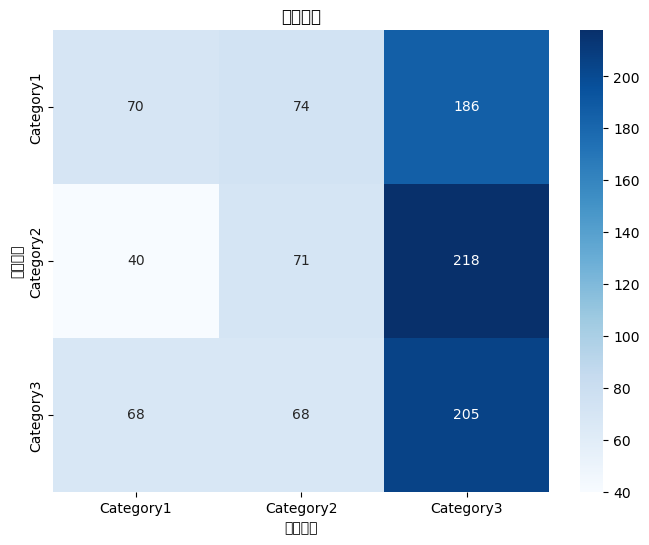

In [10]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 使用默认的字体
# mpl.rcParams["font.sans-serif"] 默认一般为 DejaVu Sans
mpl.rcParams["axes.unicode_minus"] = True

# 假设 classes 列表包含所有类别名称（英文）
classes = ["Category1", "Category2", "Category3"]

# 收集预测结果和真实标签
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# 打印分类报告
print(classification_report(all_labels, all_preds, target_names=classes))

# 绘制混淆矩阵
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵")
plt.show()

Epoch 1/20, Loss: 1.0027
Epoch 2/20, Loss: 0.9790
Epoch 3/20, Loss: 0.9526
Epoch 4/20, Loss: 0.9241
Epoch 5/20, Loss: 0.9045
Epoch 6/20, Loss: 0.8923
Epoch 7/20, Loss: 0.8832
Epoch 8/20, Loss: 0.8766
Epoch 9/20, Loss: 0.8719
Epoch 10/20, Loss: 0.8671
Epoch 11/20, Loss: 0.8628
Epoch 12/20, Loss: 0.8593
Epoch 13/20, Loss: 0.8561
Epoch 14/20, Loss: 0.8532
Epoch 15/20, Loss: 0.8499
Epoch 16/20, Loss: 0.8471
Epoch 17/20, Loss: 0.8443
Epoch 18/20, Loss: 0.8415


findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif'

Epoch 19/20, Loss: 0.8390
Epoch 20/20, Loss: 0.8365


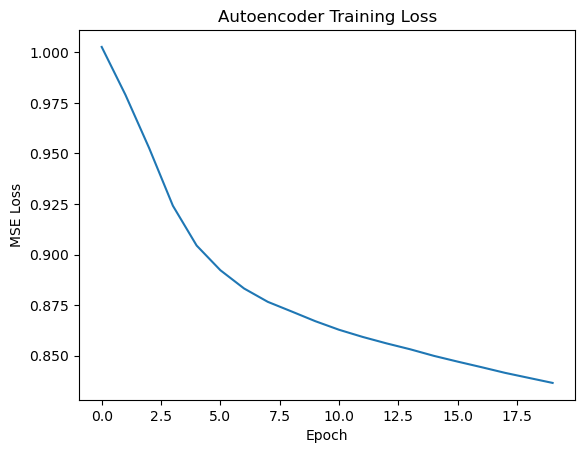

findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif' not found because none of the following families were found: default
findfont: Generic family 'sans-serif'

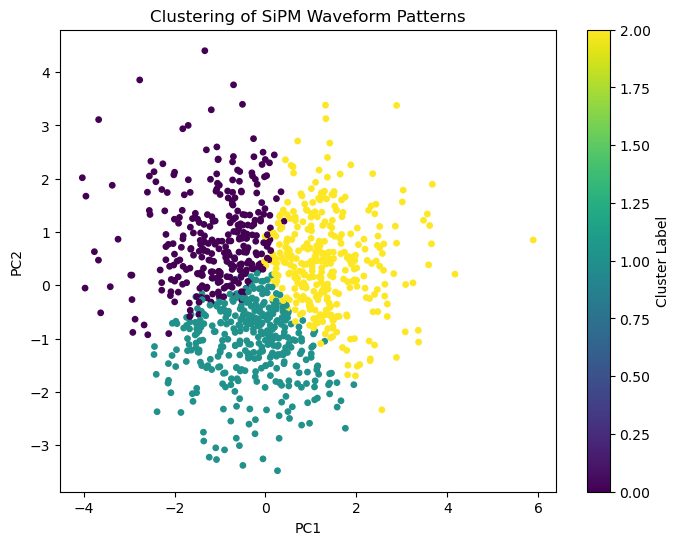

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 假设我们有 SiPM 波形数据，每个波形为 1D 信号，形状为 (num_timesteps,)
# 这里随机生成模拟数据，仅供示范
num_samples = 1000
num_timesteps = 100
X = torch.randn(num_samples, num_timesteps)

# 创建数据加载器
dataset = TensorDataset(X)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# 定义自编码器模型
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )
        
    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z

# 模型参数
input_dim = num_timesteps
latent_dim = 10

model = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练自编码器
num_epochs = 20
losses = []
for epoch in range(num_epochs):
    total_loss = 0.0
    for (batch,) in data_loader:
        optimizer.zero_grad()
        reconstruction, _ = model(batch)
        loss = criterion(reconstruction, batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.size(0)
    avg_loss = total_loss / len(dataset)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

# 绘制训练损失曲线
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.show()

# 得到所有波形的低维表示
model.eval()
latent_representations = []
with torch.no_grad():
    for (batch,) in data_loader:
        _, z = model(batch)
        latent_representations.append(z)
latent_representations = torch.cat(latent_representations, dim=0).cpu().numpy()

# 进一步可以对低维表示进行聚类分析，找出不同波形模式
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(latent_representations)

# 绘制聚类结果（如果需要用二维图展示，采用 PCA 降维）
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_representations)
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=clusters, cmap='viridis', s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering of SiPM Waveform Patterns")
plt.colorbar(label="Cluster Label")
plt.show()